<a href="https://colab.research.google.com/github/nitinrajg/ML-Projects/blob/main/Image_Recognition_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import models
dir(models)

In [2]:
alexnet = models.AlexNet()

In [ ]:
resnet = models.resnet101(pretrained=True)
resnet

In [4]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Saving cat.jpg to cat (1).jpg


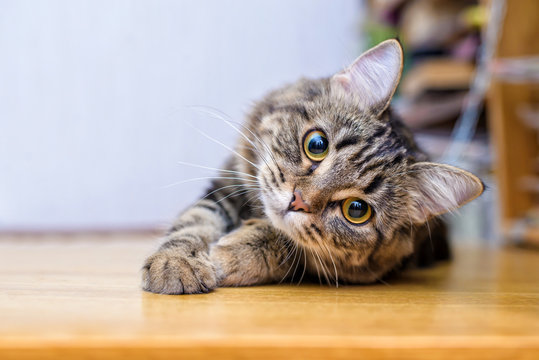

In [5]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("cat1.jpg")
img

In [6]:
img_t = preprocess(img)

Saving pug.jpg to pug.jpg


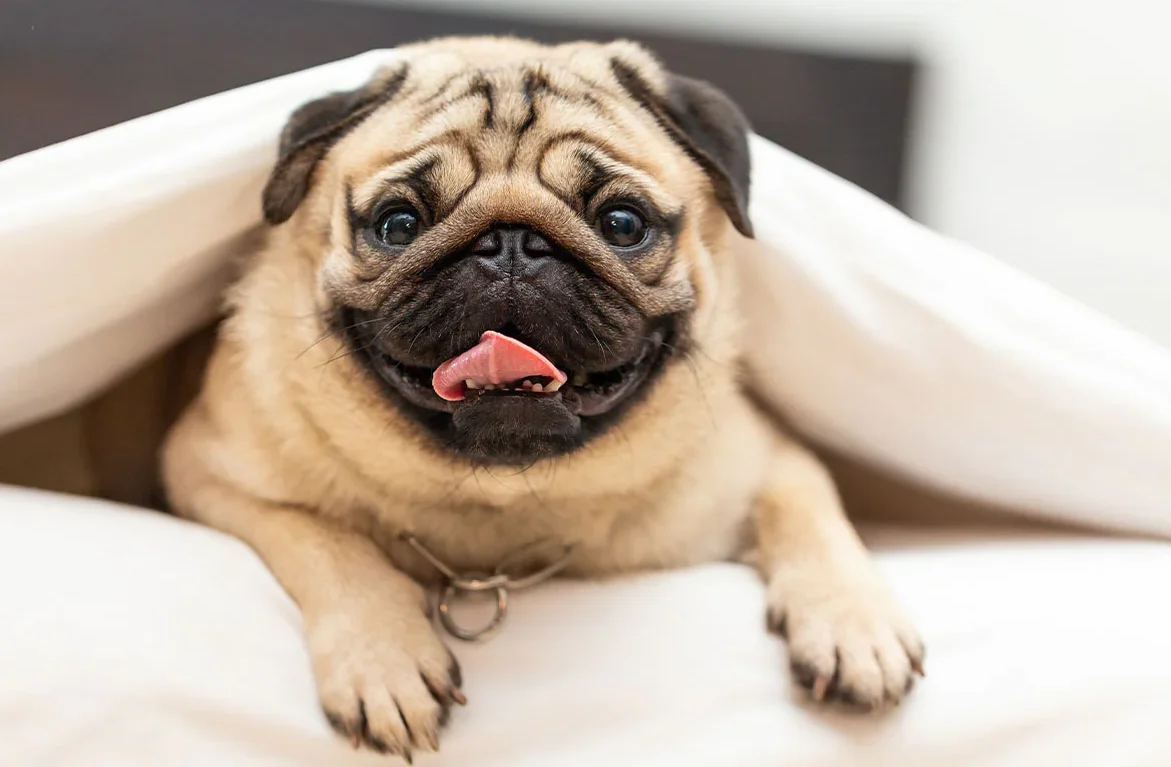

In [13]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img1 = Image.open("pug.jpg")
img1

In [14]:
img_n = preprocess(img1)

In [ ]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

In [ ]:
import torch
batch_n = torch.unsqueeze(img_n, 0)
resnet.eval()
out2 = resnet(batch_n)
out2

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

In [12]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('tabby', 78.58636474609375)

In [17]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out2, 1)

percentage = torch.nn.functional.softmax(out2, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('pug', 88.3864974975586)